#**Tatetí**
¿En cuantas manos gana el jugador X una partida de Tatetí jugando al azar?
   

---
El tres en línea, también conocido como Ceros y Cruces, tres en raya (España, Ecuador y Bolivia), Michi (en Perú), Triqui (en Colombia), Cuadritos, juego del gato, Gato (en Chile, Costa Rica y México), Tatetí (en Argentina, Paraguay y Uruguay), Totito (en Guatemala), Triqui traka, Equis Cero, Tic-Tac-Toe (en Estados Unidos), o la vieja (en Venezuela), es un juego de lápiz y papel entre dos jugadores: O y X, que marcan los espacios de un tablero de 3×3 alternadamente.

Una partida ganada por el primer jugador, X:

![picture](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e1/Tic-tac-toe-game-1.png/400px-Tic-tac-toe-game-1.png)

**Reglas del juego:**
La partida es iniciada por el jugador X, Cada jugador solo debe colocar su símbolo una vez por turno y no debe ser sobre una casilla ya jugada. Se debe conseguir realizar una línea recta horizontal, vertical o diagonal por símbolo para ganar.



---
### Objetivo del Notebook:

Con este notebook se desea calcular la probabilidad de que X gane la mano en diferentes números de jugadas.

### Condiciones:

* El jugador X comienza la partida.
* Todas las jugadas de ambos jugadores son realizadas al azar.
* Se considera una partida ganada cuando se consigue línea horizontal, vertical o en diagonal.
* Solo se considerará las partidas que el jugador X gane.

---
### Funcionamiento del algoritmo:

Se realiza una simulación de una partida en la cual cada jugador (X y O) selecciona en su respectivo turno y al azar un movimiento disponible para un tablero dado, esto se realiza mientras que la partida no haya terminado (exista un ganador o haya empate). 

Si la partida termino, se determina si el ganador es X y se cuenta el número de movimientos que realizó en esa partida. Este proceso se realiza por n partidas.








In [11]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
def inicializo_tablero():
    """
    Return: Configuración inicial del tablero.
    """
    return [[None, None, None],
            [None, None, None],
            [None, None, None]]

In [2]:
def actions(board):
    """
    Input: Tablero en un determinado estado.
    Return: Set de todas las posibles acciones (i,j) para un determinado tablero.
    """
    if not terminal(board):
        lista = list()
        for i in range (3):
            for j in range (3):
                if board[i][j] != "X" and board[i][j] != "O":
                    lista.append((i,j))
        return lista
    return (0,0)

In [3]:
def winner(board):
    """
    Input: Tablero en un determinado estado.
    Return: Devuelve el ganador de la partida, si es que hay uno.
    """
    
    cont_h = 0
    cont_v = 0
    n= 3
    #cuento horizontal y vertical
    for i in range (n):
        cont_h = 0
        initial_h = board[i][0]
        cont_v = 0
        initial_v = board[0][i]
        for j in range (n):
            if board[i][j] == initial_h and (initial_h == 'X' or initial_h == 'O') :
                cont_h += 1
            if cont_h == 3:
                return initial_h
            if board[j][i] == initial_v and (initial_v == 'X' or initial_v == 'O') :
                cont_v += 1
            if cont_v == 3:
                return initial_v
            initial_h = board[i][j]
            initial_v = board[j][i]
    #diagonal one
    cont_dig_one = 0
    initial_dig_one = board[0][0]
    for i in range (n):
        if board[i][i] == initial_dig_one:
            cont_dig_one += 1
        if cont_dig_one == 3:
            return initial_dig_one
        initial_dig_one = board[i][i]

    #diagonal two
    cont_dig_two = 0
    initial_dig_two = board[0][2]
    for i in range (n):
        if board[i][2-i] == initial_dig_two:
            cont_dig_two += 1
        if cont_dig_two == 3:
            return initial_dig_two
        initial_dig_two = board[i][2-i]
    
    return None

In [4]:
def terminal(board):
    """
    Input: Tablero en un determinado estado.
    Return: Devuelve True si la partida terminó caso contrario devuelve False.
    """
    won = winner(board)
    if won is None:
        for i in range(3):
            for j in range(3):
                if board[i][j] != "X" and board[i][j] != "O":
                    return False
    else:
        return True
    return True


In [6]:
 def result(board, action):
    """
    input: Recibe un tablero y un acción (i,j).
    Return: Debuelve el tablero actualizado con la acción (i,j).
    """
    i = action[0]
    j = action [1]
    if board[i][j] == "X" or board[i][j] == "O":
        raise "Not allow"
    else:
        turn = player(board)
        board[i][j] = turn
        return board
    
 

In [7]:
def player(board):
    """
    Input: Tablero en un determinado estado.
    Return: Devuelve quien tiene el siguiente turno en un tablero.
    """
    cont_X = 0
    cont_O = 0
    for i in range (3):
        for j in range (3):
            if board[i][j] == 'X':
                cont_X += 1
            elif board[i][j] == 'O':
                cont_O += 1
    if cont_O == 0 and cont_X == 0:
        return "X"
    if cont_X + cont_O == 9:
        return "the game is already over"
    if cont_X <= cont_O:
        return "X"

    return "O"


In [8]:
def jugadas_de_x (board):
    '''
    Input: Tablero en un determinado estado.
    Return: Devuelve el número de jugadas que realizó el jugador X.
    '''
    cont_x = 0
    for i in range(3):
        for j in range(3):
            if board[i][j] == 'X':
                cont_x += 1
    return cont_x


In [9]:
def exprimento(partidas):
  """
  Input: número de partida a jugar
  Return: Devuelve un array con el numero de jugadas que hizo X en cada partida que gano
  """
  numero_jugadas= []
  for i in range(partidas):
      tablero = inicializo_tablero() #Inicializo el tablero
      # Mientras no haya ningún ganador
      while terminal(tablero) is False:  
          turno = player(tablero)   # Determino de quien es el turno
          movimientos = actions(tablero)  # Determino los movimientos posibles del tablero
          movimiento = random.choice(movimientos)  #Selecciono un movimiento al azar.
          result(tablero, movimiento)  # Actualizo el tablero.
      # Verifico quien si fue X el que realizó la ultima jugada
      if turno == 'X': 
          ganador = winner(tablero) # Determino el ganador
          if ganador == 'X':  # Si fue X lo cuento
              numero_jugadas.append(jugadas_de_x (tablero))
              if i % 100 == 0:
                print ("Tablero #: "+ str(i))
                # Imprimo algunas partidas:
                print (tablero[0])
                print (tablero[1])
                print (tablero[2])
                print ("==================")
  return numero_jugadas
 

Tablero #: 0
['X', 'O', 'O']
['O', 'X', 'X']
['O', 'X', 'X']
Tablero #: 500
['X', 'O', None]
['X', 'X', 'X']
[None, 'O', 'O']
Tablero #: 600
[None, 'O', 'X']
['O', None, 'X']
['O', 'X', 'X']
Tablero #: 700
[None, 'O', 'X']
['O', 'X', 'O']
['X', None, 'X']
Tablero #: 900
['X', 'O', 'O']
['X', None, None]
['X', 'X', 'O']
Tablero #: 1100
['O', 'X', 'O']
['O', 'O', 'X']
['X', 'X', 'X']
Tablero #: 1400
['O', 'X', 'O']
['O', 'O', 'X']
['X', 'X', 'X']
Tablero #: 1500
[None, 'O', None]
[None, 'O', None]
['X', 'X', 'X']
Tablero #: 1800
['O', 'X', 'X']
['O', 'O', 'X']
['X', 'O', 'X']
Tablero #: 1900
['O', None, 'X']
['O', 'O', None]
['X', 'X', 'X']
Tablero #: 2000
['O', None, None]
['X', 'X', 'X']
['O', 'O', 'X']
Tablero #: 2100
['X', 'X', 'X']
['O', 'X', 'O']
[None, None, 'O']
Tablero #: 2200
['X', 'X', 'X']
['O', None, 'O']
['O', 'X', None]
Tablero #: 2500
['X', 'O', None]
['X', 'X', 'X']
[None, 'O', 'O']
Tablero #: 2700
['X', 'O', 'O']
['O', 'X', 'X']
['O', 'X', 'X']
Tablero #: 2800
['X', Non

<Figure size 432x288 with 0 Axes>

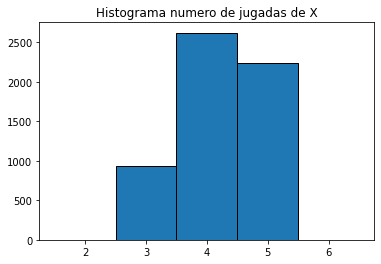

<Figure size 432x288 with 0 Axes>

In [12]:
partidas = 10000
numero_jugadas = exprimento(partidas)
array =  np.asarray(numero_jugadas) 
plt.hist(array,bins = [2,3,4,5,6,7], align='left',ec='black')
plt.title("Histograma numero de jugadas de X")
plt.figure()   

In [13]:
df_describe = pd.DataFrame(array)
df_describe.describe()

,0
count,5789.000000
mean,4.223355
std,0.705419
min,3.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


In [14]:
ganadas_con_tres = np.count_nonzero(array == 3)
ganadas_con_cuatro = np.count_nonzero(array == 4)
ganadas_con_cinco = np.count_nonzero(array == 5)

print ("Número de partidas jugadas: " + str(partidas))
print ("Número de partidas ganadas por X: " + str(len(array)))
print ("La probabilidad que X gane con tres jugadas es: " + f'{ganadas_con_tres/partidas*100:>.2f}' + "%")
print ("La probabilidad que X gane con cuatro jugadas es: " + f'{ganadas_con_cuatro/partidas*100:>.2f}' + "%")
print ("La probabilidad que X gane con cinco jugadas es: " + f'{ganadas_con_cinco/partidas*100:>.2f}' + "%")


Número de partidas jugadas: 10000
Número de partidas ganadas por X: 5789
La probabilidad que X gane con tres jugadas es: 9.38%
La probabilidad que X gane con cuatro jugadas es: 26.20%
La probabilidad que X gane con cinco jugadas es: 22.31%
